<a href="https://colab.research.google.com/github/shimjaeman/PyTorch-Tutorials/blob/main/08_(Pytorch)_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이진 분류(Binary Classification)

* 이진 분류(Binary Classification)
  - 이진 분류란, 문제에 대한 정답을 두 가지 답 중 하나로 분류하는 것을 의미한다.

  - 이진분류의 그래프의 알파벳 S자 형태로 표현할 수 있는 함수가 필요

  - 선형 회귀는 Outlier(이상치)에 약하기 때문에 분류 문제에 잘 동작하지 않는다.

  - 따라서, 이러한 이진 분류 문제를 해결하기 위한 회귀 방법 중 하나가, 로지스틱 회귀(Logistic Regression)이다.

  - 특히 S자 모양의 그래프를 만들수 있는 시그모이드함수를 주로 사용한다. 

* 시그모이드 (Sigmoid function)
  -  입력값이 한없이 커지면 1에 수렴
  - 입력값이 한없이 작아지면 0에 수렴
  - 시그모이드 함수의 출력값은 0과 1 사이의 값을 가지기에 분류 작업에 사용 가능
  - 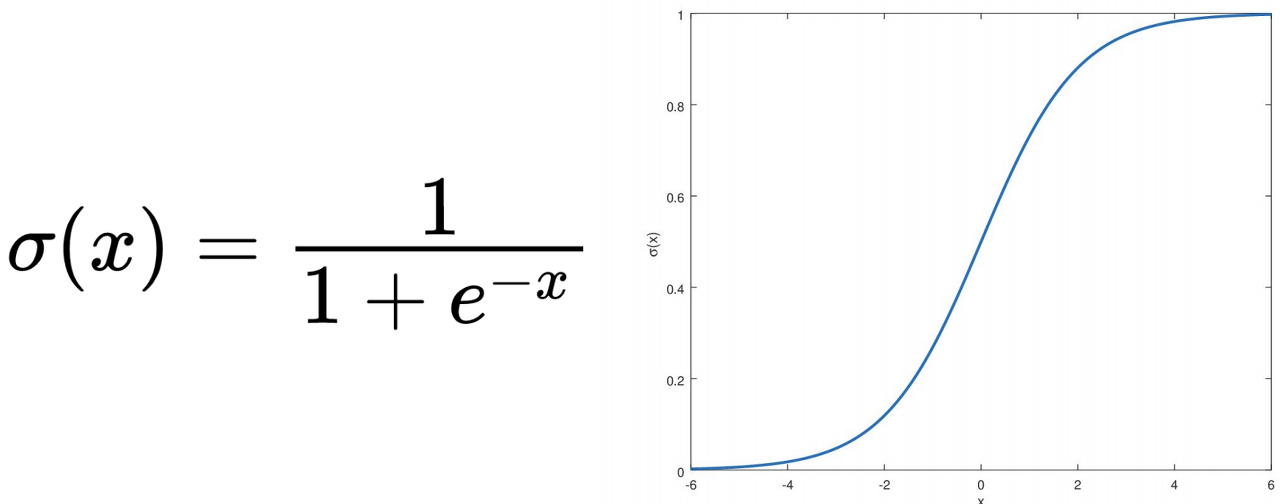

* 비용 함수 (Cost Function)
  - 선형회귀(Linear Regression)에서는 직선을 가설로 사용하고, mse(mean square error)를 비용 함수로 사용한다.

  - 하지만, 로지스틱 회귀(Logistic Regression)에서는 가설로 시그모이드(Sigmoid) 함수를 사용하기 때문에, mse 로는 비용 함수를 구하기 어렵다.

  - 만약, 가설로 시그모이드(Sigmoid) 함수를 사용하고, 비용 함수로 mse 를 사용한다면 아래와 같은 결과가 나타날 것이다.

  - 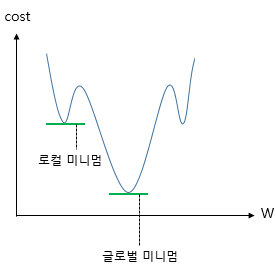

  - mse를 사용해 구한 cost 함수에서는 로컬 미니멈(Local Minimum)에 도달하여 gradient descent 알고리즘이 제대로 동작하지 않게 된다.

  - 이를 해결하기 위해, Logistic Regression 에서는 비용함수로 Binary Cross Entropy 를 사용한다.

* Binary Cross Entropy
  - Binary Cross Entropy는 cost를 계산할 때, 노드의 실제 값에 따라 다른 방식으로 오차를 구한다.
  - 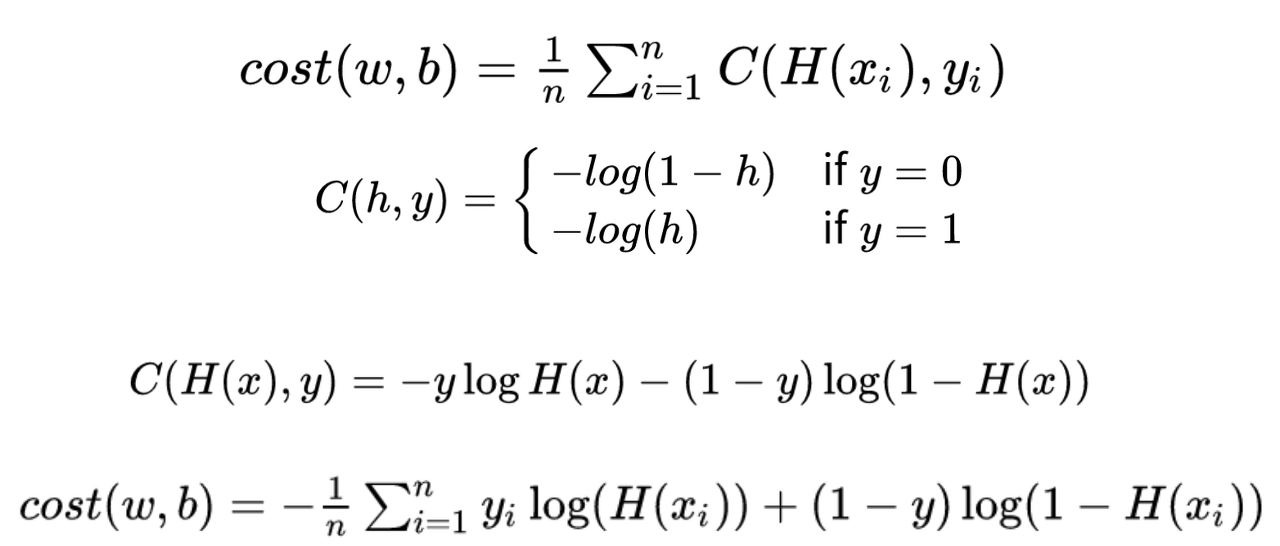

* Result

1. Linear Regression
  - 가설 : 직선
  - cost 함수 : Mean Square Error

2. Logistic Regression
  - 가설 : Sigmoid
  - cost 함수 : Binary Cross Entropy

In [29]:
# 기본 라이브러리
import numpy as np
import pandas as pd

# Pytorch 라이브러리
import torch
import torchvision
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader 
import torchvision.transforms as transforms 
from tqdm import tqdm  

# colab drive 호출
from google.colab import drive

In [30]:
%cd /content/drive/MyDrive/study/Python/Pytorch/모두를 위한 딥러닝 시즌2 - PyTorch

/content/drive/MyDrive/study/Python/Pytorch/모두를 위한 딥러닝 시즌2 - PyTorch


In [42]:
class Binary_Classification (nn.Module):
    def __init__(self):
        super(Binary_Classification, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

In [43]:
# cpu cuda
device = "cuda" if torch.cuda.is_available() else "cpu"

In [44]:
# 데이터 입력
x = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x).to(device)
y_train = torch.FloatTensor(y).to(device)

In [45]:
# 모델 설정정
model = Binary_Classification()
criterion = F.binary_cross_entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [46]:
# 모델 구동동
nb_epochs = 300
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    scores = model(x_train)

    # cost 계산
    cost = criterion(scores, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = scores >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/200 Cost: 0.672296 Accuracy 66.67%
Epoch   10/200 Cost: 0.658207 Accuracy 66.67%
Epoch   20/200 Cost: 0.644416 Accuracy 83.33%
Epoch   30/200 Cost: 0.630670 Accuracy 83.33%
Epoch   40/200 Cost: 0.616808 Accuracy 83.33%
Epoch   50/200 Cost: 0.602791 Accuracy 83.33%
Epoch   60/200 Cost: 0.588621 Accuracy 83.33%
Epoch   70/200 Cost: 0.574326 Accuracy 83.33%
Epoch   80/200 Cost: 0.559959 Accuracy 83.33%
Epoch   90/200 Cost: 0.545587 Accuracy 83.33%
Epoch  100/200 Cost: 0.531280 Accuracy 83.33%
Epoch  110/200 Cost: 0.517106 Accuracy 83.33%
Epoch  120/200 Cost: 0.503125 Accuracy 83.33%
Epoch  130/200 Cost: 0.489392 Accuracy 83.33%
Epoch  140/200 Cost: 0.475949 Accuracy 83.33%
Epoch  150/200 Cost: 0.462830 Accuracy 83.33%
Epoch  160/200 Cost: 0.450065 Accuracy 83.33%
Epoch  170/200 Cost: 0.437673 Accuracy 83.33%
Epoch  180/200 Cost: 0.425674 Accuracy 83.33%
Epoch  190/200 Cost: 0.414079 Accuracy 83.33%
Epoch  200/200 Cost: 0.402895 Accuracy 83.33%
